## Evaluating Rainbow keys: size, signature and verification comparison to RSA and DSA

Claudia Flores, Michael Kamida, and Madhukar Yedulapuram 

We conducted a [rainbow benchmarking repository](https://github.com/floresclaudiaa/rainbowbch.git) experiment to compare key sizes, key generation, signature, and verification in rainbow to RSA and DSA in the GPG/PGP standard.

We expected the following: 

1. large key sizes, slower key generation and quick signatures and verification for rainbow
2. Faster key generation and comparable signatures and verification for RSA and DSA

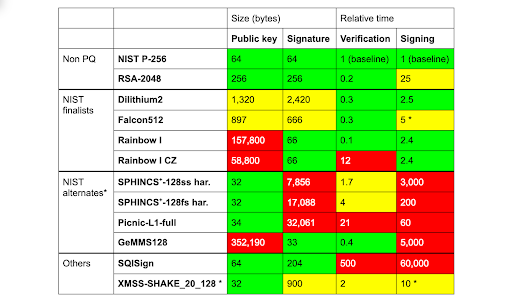

Here are our findings:



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

rainbow_bch = pd.read_csv('MicsCryptoProjectStats.csv')

print(rainbow_bch.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   key                  90 non-null     int64  
 1   key_type             90 non-null     object 
 2   key_size             90 non-null     int64  
 3   key_generation_time  90 non-null     float64
 4   signature_time       90 non-null     float64
 5   verification_time    90 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 4.3+ KB
None


There are 90 keys in this data. We created 10 keys for each of the following key types: 

1. RSA: 1024, 2048, 3072, 4096
2. DSA: 768, 896, 1024
3. Rainbow Optimized with secret key size: 103648 and public key size: 161600
4. Rainbow Reference with secret key size: 103648 and public key size: 161600



In [2]:
rainbow_bch.describe()

,key,key_size,key_generation_time,signature_time,verification_time
count,90.000000,90.000000,9.000000e+01,9.000000e+01,9.000000e+01
mean,45.500000,37347.555556,1.797489e-06,1.798089e-06,1.878933e-06
std,26.124701,66796.234959,6.032993e-07,6.445515e-07,6.657087e-07
min,1.000000,768.000000,6.340000e-07,6.860000e-07,7.190000e-07
25%,23.250000,1024.000000,1.522500e-06,1.452500e-06,1.545000e-06
50%,45.500000,2048.000000,1.745000e-06,1.740000e-06,1.870000e-06
75%,67.750000,4096.000000,2.105000e-06,2.227500e-06,2.350000e-06
max,90.000000,161600.000000,3.620000e-06,3.490000e-06,3.360000e-06


Please note that the key size will be skewed toward the large rainbow key sizes as the key size data from the RSA and DSA keys was not extracted, and we only have key length to compare.


In [34]:
rainbow_bch.head()

,key,key_type,key_size,key_generation_time,signature_time,verification_time
0,1,dsa,768,0.000002,0.000002,0.000003
1,2,dsa,768,0.000002,0.000002,0.000002
2,3,dsa,768,0.000002,0.000002,0.000002
3,4,dsa,768,0.000003,0.000002,0.000001
4,5,dsa,768,0.000002,0.000002,0.000003


In [4]:
rainbow_bch['key_generation_time'].describe()

count    9.000000e+01
mean     1.797489e-06
std      6.032993e-07
min      6.340000e-07
25%      1.522500e-06
50%      1.745000e-06
75%      2.105000e-06
max      3.620000e-06
Name: key_generation_time, dtype: float64

In [5]:
rainbow_bch['signature_time'].describe()

count    9.000000e+01
mean     1.798089e-06
std      6.445515e-07
min      6.860000e-07
25%      1.452500e-06
50%      1.740000e-06
75%      2.227500e-06
max      3.490000e-06
Name: signature_time, dtype: float64

In [6]:
rainbow_bch['verification_time'].describe()

count    9.000000e+01
mean     1.878933e-06
std      6.657087e-07
min      7.190000e-07
25%      1.545000e-06
50%      1.870000e-06
75%      2.350000e-06
max      3.360000e-06
Name: verification_time, dtype: float64

In [29]:
dsa = rainbow_bch[rainbow_bch['key_type'] == 'dsa']
rsa = rainbow_bch[rainbow_bch['key_type'] == 'rsa']
rainbow_opt = rainbow_bch[rainbow_bch['key_type'] == 'rainbow_opt']
rainbow_ref = rainbow_bch[rainbow_bch['key_type'] == 'rainbow_ref']

<AxesSubplot: title={'center': 'Key Type vs. Key Generation Time'}, xlabel='key_type', ylabel='key_generation_time'>

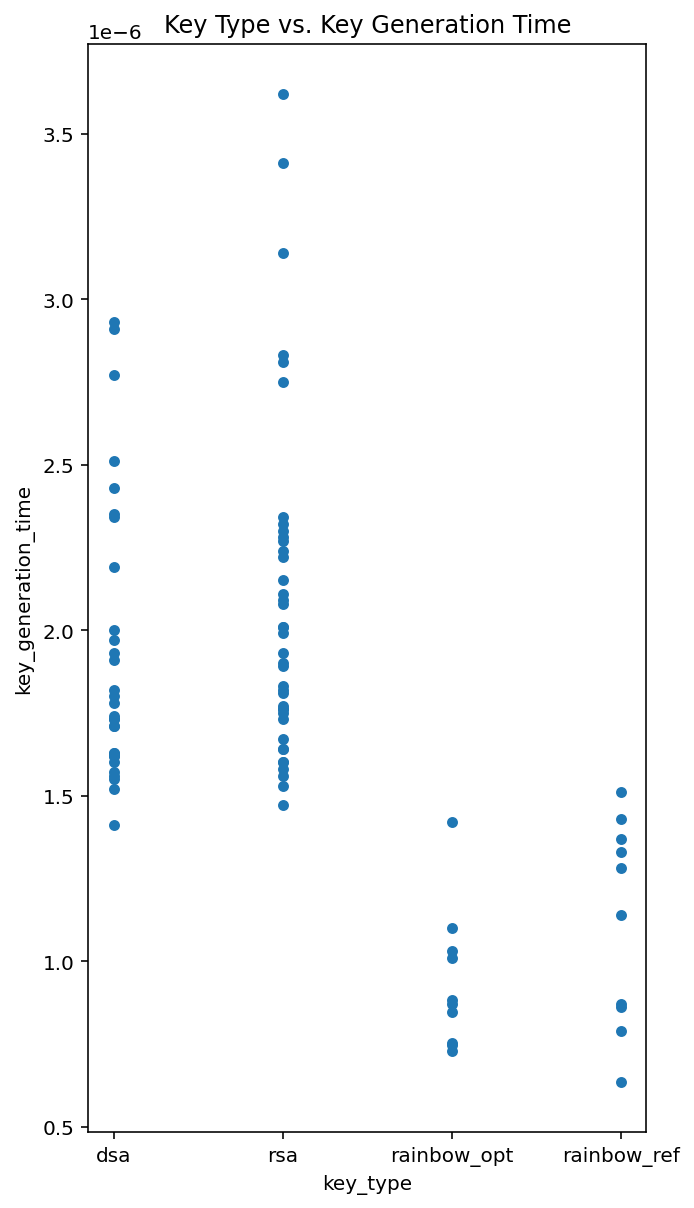

In [16]:
rainbow_bch.plot(x='key_type', y='key_generation_time', kind='scatter', title='Key Type vs. Key Generation Time', figsize=(5,10))


Our findings show that the amount of time to generate a key for RSA and DSA are comparable using GPG/PGP implementation but unlike our expectations, the data shows that the amount of time to generate rainbow keys was faster than the time it took our program to generate RSA keys. This can be because of many reasons, one being that the GPG/PGP implementation runs other operational requirements during key generation that is not run in the rainbow implementation, and therefore increasing the timestamp for RSA and DSA key generation. I could not find a definitive answer on this topic in GPG/PGP documentation. Additionally, it is worth noting that the optimized version showed a slightly quicker key generation time.



<AxesSubplot: title={'center': 'Key Size vs. Key Generation Time'}, xlabel='key_size', ylabel='key_generation_time'>

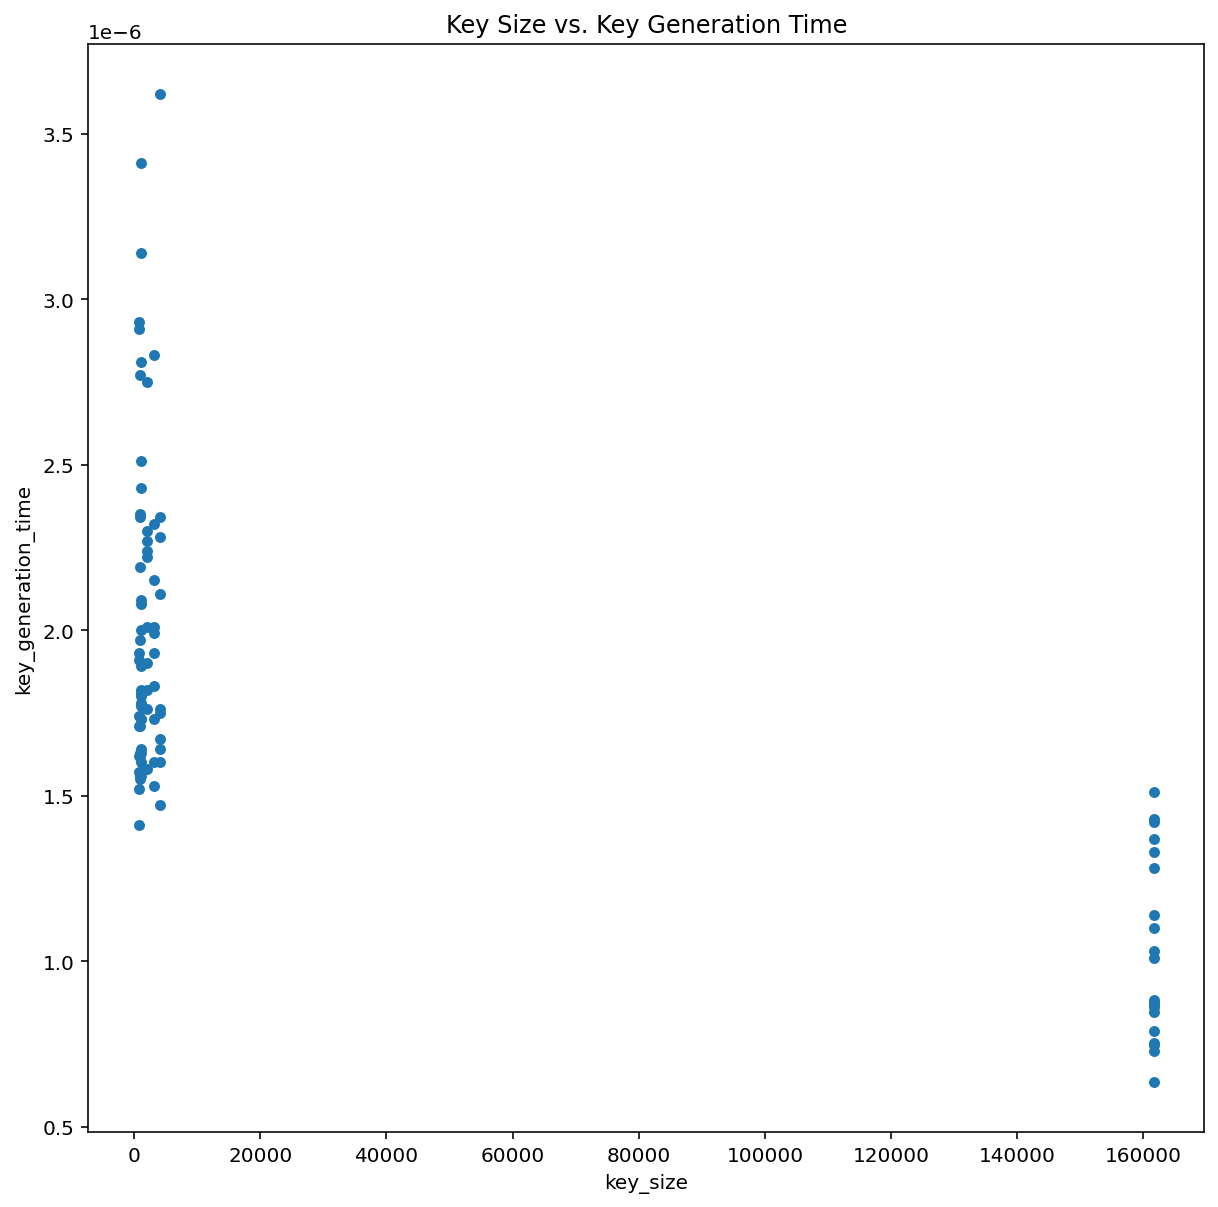

In [20]:
rainbow_bch.plot(x='key_size', y='key_generation_time', kind='scatter', title='Key Size vs. Key Generation Time', figsize=(10,10))


Our findings show that the larger sized rainbow keys were quicker to generate but like mentioned above, this could be for reasons outside of more efficient key generation time. 


<AxesSubplot: title={'center': 'Key Type vs. Signature Time'}, xlabel='key_type', ylabel='signature_time'>

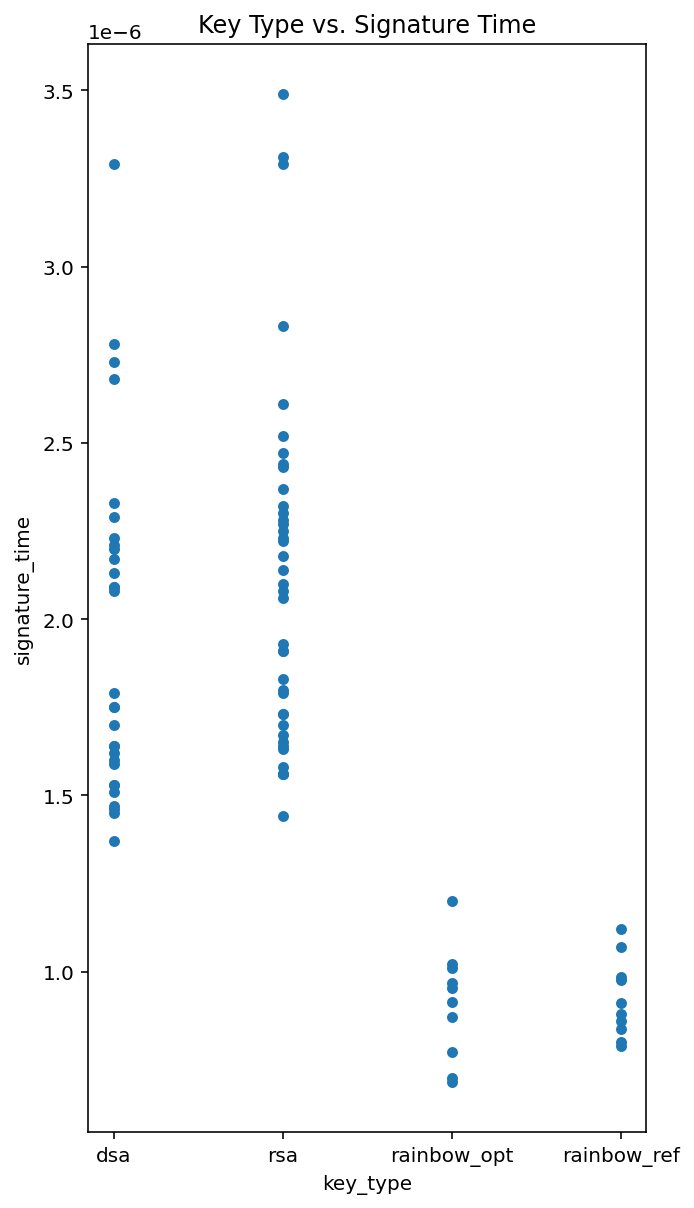

In [17]:
rainbow_bch.plot(x='key_type', y='signature_time', kind='scatter', title='Key Type vs. Signature Time', figsize=(5,10))


<AxesSubplot: title={'center': 'Key Size vs. Signature Time'}, xlabel='key_size', ylabel='signature_time'>

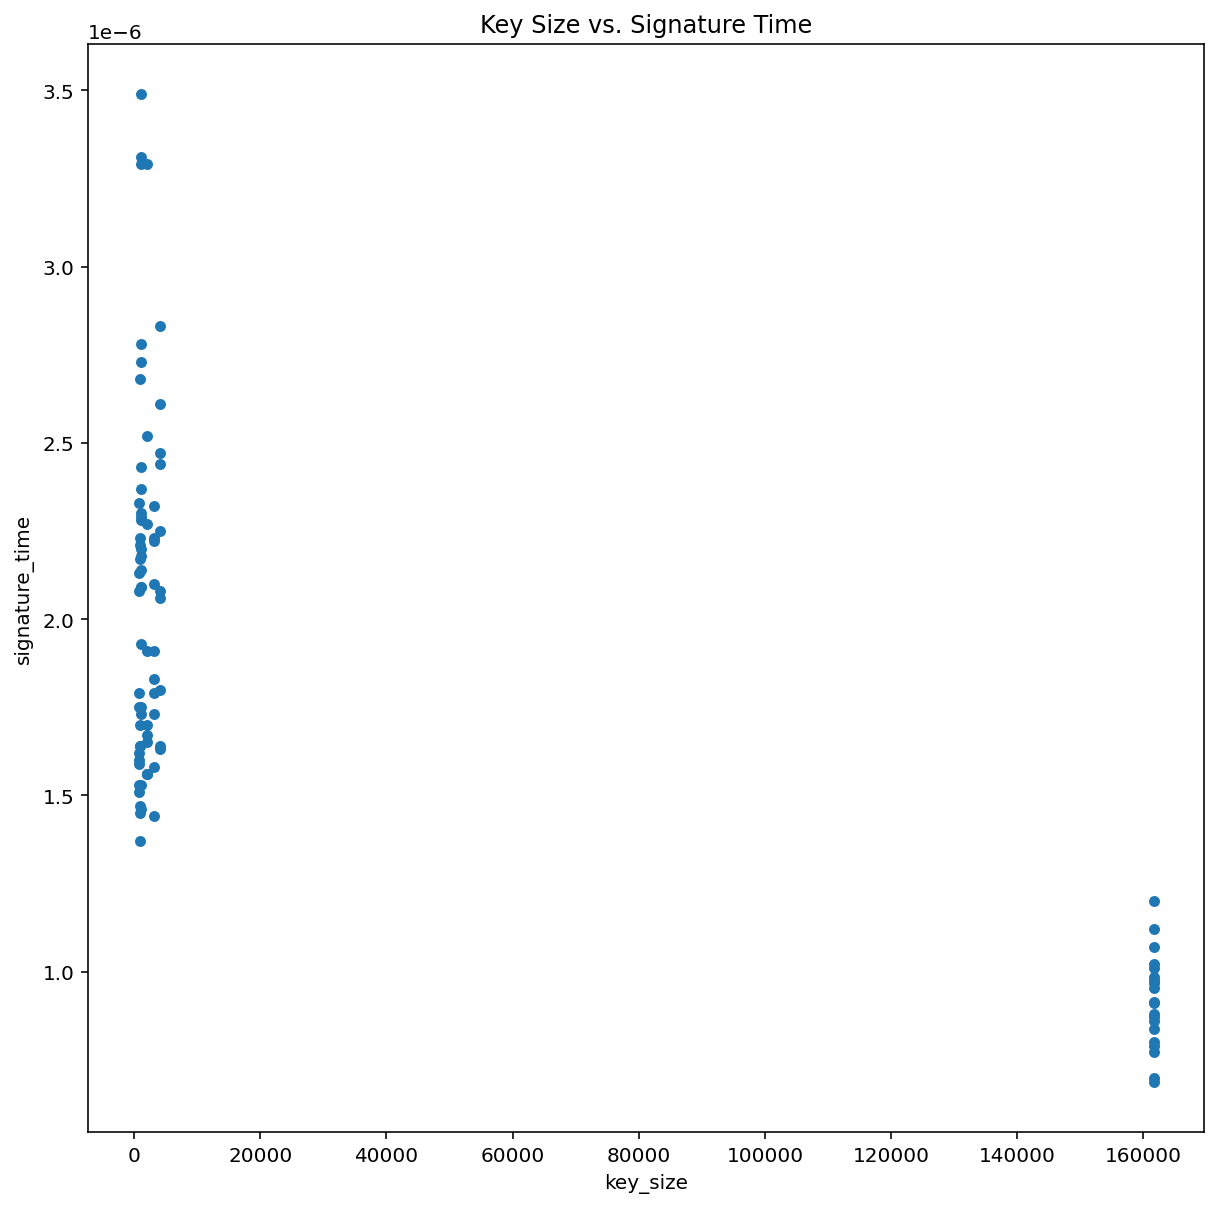

In [22]:
rainbow_bch.plot(x='key_size', y='signature_time', kind='scatter', title='Key Size vs. Signature Time', figsize=(10,10))


As expected the rainbow keys showed quick signatures despite their size. Additionally, the optimized version also showed a more efficient signature time.


<AxesSubplot: title={'center': 'Key Type vs. Verification Time'}, xlabel='key_type', ylabel='verification_time'>

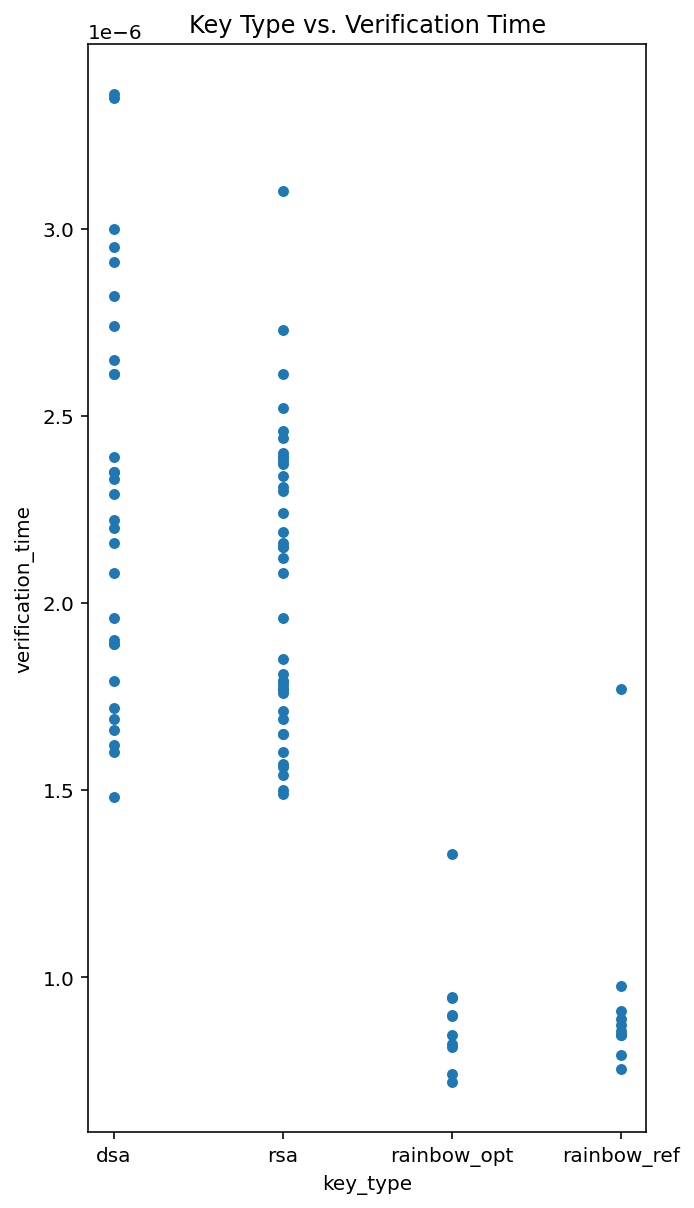

In [24]:
rainbow_bch.plot(x='key_type', y='verification_time', kind='scatter', title='Key Type vs. Verification Time', figsize=(5,10))


<AxesSubplot: title={'center': 'Key Size vs. Verification Time'}, xlabel='key_size', ylabel='verification_time'>

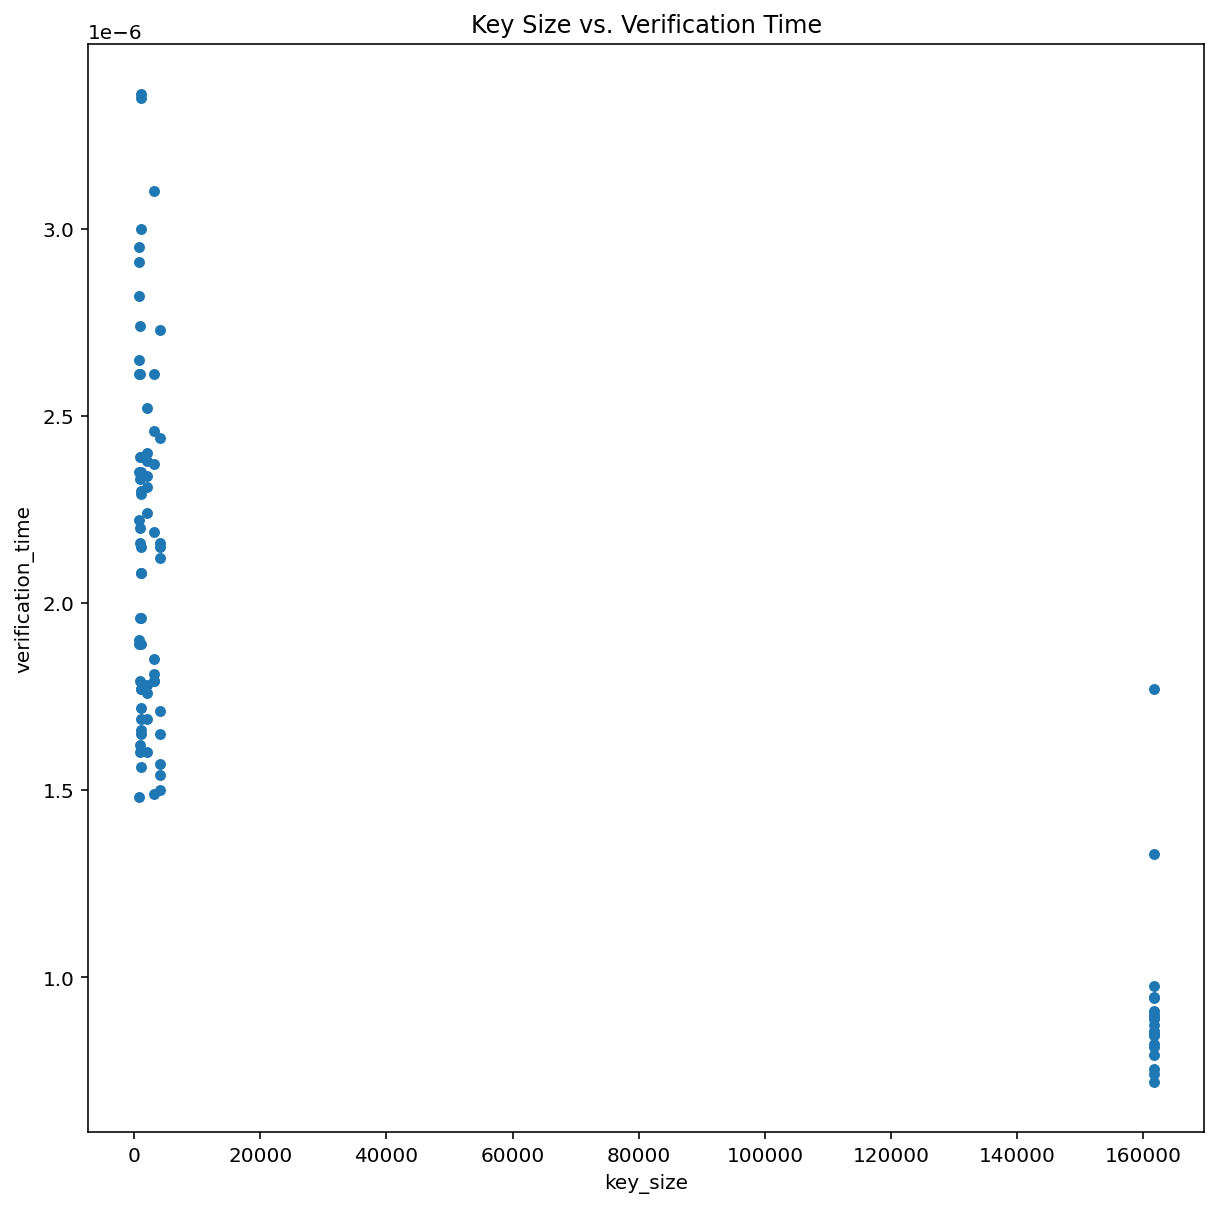

In [25]:
rainbow_bch.plot(x='key_size', y='verification_time', kind='scatter', title='Key Size vs. Verification Time', figsize=(10,10))


As expected the rainbow keys showed quick verification time despite their size. Additionally, the optimized version also showed a more efficient verification time.


# Conclusion

After conducting a [rainbow benchmarking repository](https://github.com/floresclaudiaa/rainbowbch.git) experiment to compare key sizes, key generation, signature, and verification in rainbow to RSA and DSA in the GPG/PGP standard, we can conlcude that a larger sample should be tested and additional understanding of the GPG/PGP key generation, signature, and verification is needed to accurately assess the data we gathered.

90 keys were analyzed in this data after we created 10 keys for each of the following key types: 

1. RSA: 1024, 2048, 3072, 4096
2. DSA: 768, 896, 1024
3. Rainbow Optimized with secret key size: 103648 and public key size: 161600
4. Rainbow Reference with secret key size: 103648 and public key size: 161600

##### We expected the following:

1. large key sizes, slower key generation and quick signatures and verification for rainbow
2. Faster key generation and comparable signatures and verification for RSA and DSA

Please note that the key size will be skewed toward the large rainbow key sizes as the key size data from the RSA and DSA keys was not extracted, and we only have key length to compare.

##### Here are our findings:

Our findings show that the amount of time to generate a key for RSA and DSA are comparable using GPG/PGP implementation but unlike our expectations, the data shows that the amount of time to generate rainbow keys was faster than the time it took our program to generate RSA keys. This can be because of many reasons, one being that the GPG/PGP implementation runs other operational requirements during key generation that is not run in the rainbow implementation, and therefore increasing the timestamp for RSA and DSA key generation. I could not find a definitive answer on this topic in GPG/PGP documentation. Our findings show that the large rainbow keys were quicker to generate but like mentioned above, this could be for reasons outside of more efficient key generation time.Additionally, it is worth noting that the optimized version showed a slightly quicker key generation time. 

1. As a result, the data gathered from key generation is not conclusive
2. As expected the rainbow keys showed quick signatures despite their size. Additionally, the optimized version also showed a more efficient signature time.
3. As expected the rainbow keys showed quick verification time despite their size. Additionally, the optimized version also showed a more efficient verification time.

